# Statsmodels Code Utils

This notebook includes different code utils for Statsmodels in Time Series.

In [7]:
# Import Standard Libraries
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

In [2]:
# Read data
macrodata_dataset = pd.read_csv('./../../data/raw/macrodata.csv', index_col=0, parse_dates=True)

# Operations

## Hodrick-Prescott Filter

<Axes: >

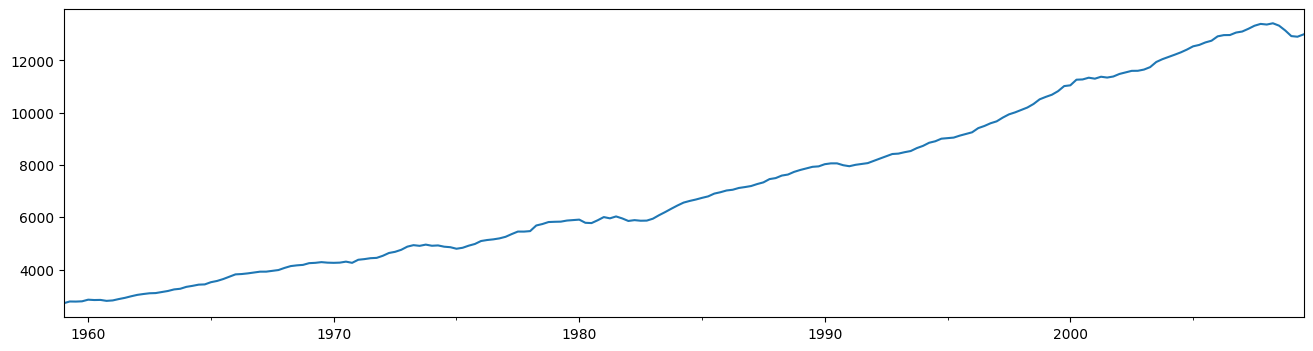

In [14]:
# Let's see the data
macrodata_dataset['realgdp'].plot(figsize=(16, 4))

In [8]:
# Use HP filter to separate trand component from cyclic one
gdp_cyclic, gdp_trend = hpfilter(macrodata_dataset['realgdp'], lamb=1600)

In [11]:
# Add gdp_trend back to dataframe
macrodata_dataset['gdp_trend'] = gdp_trend

<Axes: >

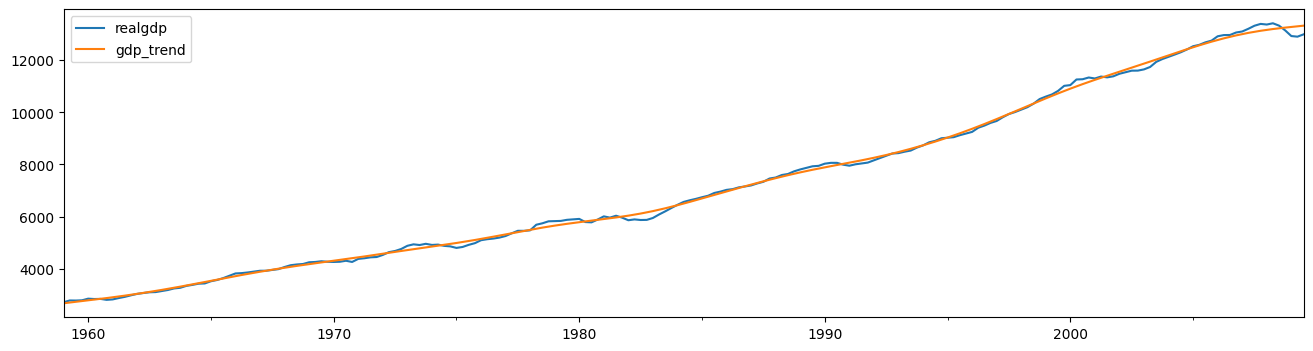

In [13]:
# Plot gdp_trend vs realgdp
macrodata_dataset[['realgdp', 'gdp_trend']].plot(figsize=(16, 4))

In [15]:
macrodata_dataset.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

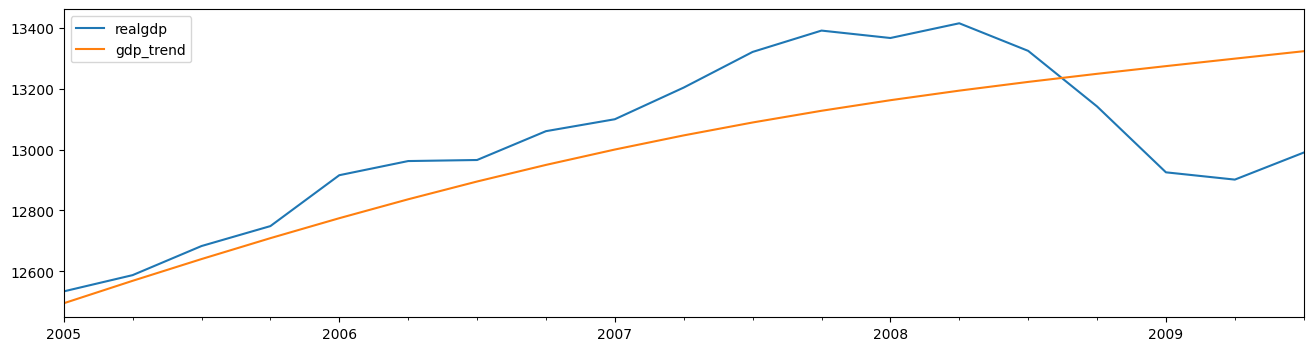

In [22]:
# Focus on just before the 2008 economic crisis
macrodata_dataset[['realgdp', 'gdp_trend']].loc['2005-01-01':, :].plot(figsize=(16, 4))